# **Notes for Silhouette Scores Evaluation**

0.71 - 1.0: A strong structure has been found.

0.51 - 0.70: A reasonable structure has been found.

0.26 - 0.50: The structure is weak and could be artificial. Consider trying different clustering methods or features.

< 0.25: No substantial structure has been found.


# **Data Cleaning and Prepocessing**

## **Importing Data**

In [ ]:
#Import Data

import pandas as pd
df = pd.read_csv('/content/Telco_customer_churn_adapted_v2.xlsx - original.csv')
df.head()

,Tenure Months,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
0,2,Yes,Yes,No,No,No,No,70.005,Yes,4210.7
1,2,No,No,No,No,No,No,91.910,Yes,3511.3
2,8,No,No,Yes,No,Yes,Yes,129.545,Yes,6983.6
3,28,No,No,Yes,Yes,Yes,Yes,136.240,Yes,6503.9
4,49,No,Yes,Yes,No,Yes,Yes,134.810,Yes,6942.0


In [ ]:
df.info()
#there's no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tenure Months                 7043 non-null   int64  
 1   Games Product                 7043 non-null   object 
 2   Music Product                 7043 non-null   object 
 3   Education Product             7043 non-null   object 
 4   Call Center                   7043 non-null   object 
 5   Video Product                 7043 non-null   object 
 6   Use MyApp                     7043 non-null   object 
 7   Monthly Purchase (Thou. IDR)  7043 non-null   float64
 8   Churn Label                   7043 non-null   object 
 9   CLTV (Predicted Thou. IDR)    7043 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 550.4+ KB


## **EDA**

In [ ]:
data=df.copy()

In [ ]:
data['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

In [ ]:
data['Churn Label'] = data['Churn Label'].replace({'Yes': 1, 'No': 0})

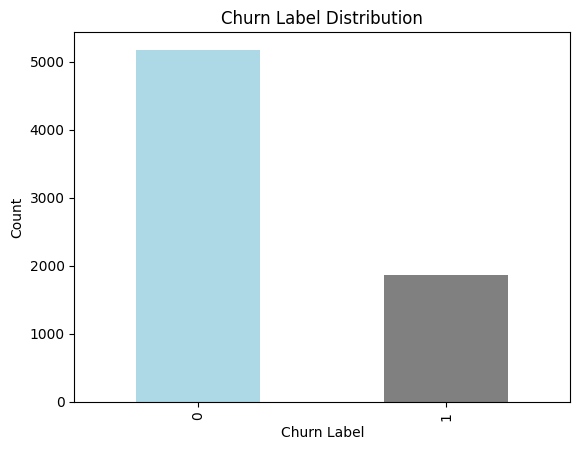

In [ ]:
import matplotlib.pyplot as plt

# Assuming data is your DataFrame
data['Churn Label'].value_counts().plot(kind='bar', color=['lightblue', 'grey'])
plt.title('Churn Label Distribution')
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.show()

In [ ]:
mask = data['Churn Label'] != 1
data = data[mask].copy()

data

,Tenure Months,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
1869,1,No,Yes,No,No,No,No,38.805,0,5153.2
1870,34,Yes,No,Yes,No,No,No,74.035,0,4473.3
1871,45,Yes,No,Yes,Yes,No,No,54.990,0,5599.1
1872,22,No,Yes,No,No,Yes,No,115.830,0,5796.7
1873,10,Yes,No,No,No,No,No,38.675,0,2616.9
...,...,...,...,...,...,...,...,...,...,...
7038,72,No internet service,No internet service,No internet service,No,No internet service,No internet service,27.495,0,6897.8
7039,24,Yes,No,Yes,Yes,Yes,Yes,110.240,0,2782.0
7040,72,No,Yes,Yes,No,Yes,Yes,134.160,0,7228.0
7041,11,Yes,No,No,No,No,No,38.480,0,3630.9


## **Creating Features based on FRM**

In [ ]:
data['Call Center'] = data['Call Center'].replace({'Yes': 1, 'No': 0})

In [ ]:
obj_col = data.select_dtypes('O').columns
for col in obj_col:
    data[col] = data[col].replace({'Yes': 1, 'No': 0, 'No internet service':0})

### **Frek (Counting Product)**

In [ ]:
data["Count Used Product"]=data['Games Product']+data['Music Product']+data['Education Product']+data['Video Product']+data['Use MyApp']+data['Call Center']

In [ ]:
analysis=data

In [ ]:
data=data.drop(['Games Product','Music Product','Education Product','Video Product','Use MyApp','Call Center'], axis=1)

### **Tenure (Recency) and Monetary (Monthly Purchase (Thou. IDR) or CLTV (Predicted Thou. IDR))**

In [ ]:
data.head()

,Tenure Months,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR),Count Used Product
1869,1,38.805,0,5153.2,1
1870,34,74.035,0,4473.3,2
1871,45,54.990,0,5599.1,3
1872,22,115.830,0,5796.7,2
1873,10,38.675,0,2616.9,1


# **K-Means**

## **K-Means Monthly Purchase (Thou. IDR)**

Given your silhouette score of 0.6366122757251996, it falls into the "reasonable structure has been found" category. It suggests that the clusters are well-defined and the data points within each cluster are more similar to each other than to points in other clusters.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
X=data.drop(['CLTV (Predicted Thou. IDR)','Churn Label'], axis=1)

In [ ]:
X

,Tenure Months,Monthly Purchase (Thou. IDR),Count Used Product
1869,1,38.805,1
1870,34,74.035,2
1871,45,54.990,3
1872,22,115.830,2
1873,10,38.675,1
...,...,...,...
7038,72,27.495,0
7039,24,110.240,5
7040,72,134.160,4
7041,11,38.480,1


## **Hyperparameter Tuning and Modelling**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.6366122757251996


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 3 clusters: 0.5784483213495972


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 clusters: 0.5630506796751367


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 5 clusters: 0.5744818199162719


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 6 clusters: 0.5639235168431711


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 7 clusters: 0.5468042544764241


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 8 clusters: 0.5519651859265396


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 9 clusters: 0.5494213256179662


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 10 clusters: 0.5665432483195286


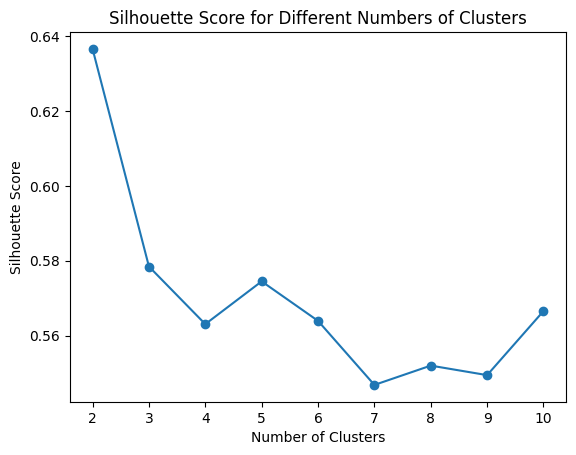

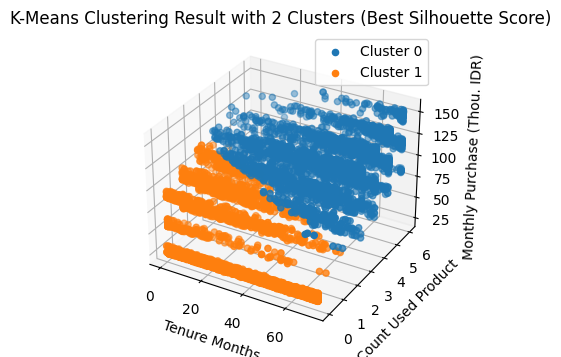

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction (1 component)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Experiment with different numbers of clusters
n_clusters_range = range(2, 11)
silhouette_scores = []
best_n_clusters = None
cluster_labels_best = None
best_silhouette_score = -1

for n_clusters in n_clusters_range:
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

    # Update if the current clustering result has a higher silhouette score
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = n_clusters
        cluster_labels_best = cluster_labels.copy()

# Plot silhouette scores for different cluster numbers
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

# 3D Scatter plot based on original features with color-coded clusters
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')

# Assuming X is a DataFrame
for i in range(best_n_clusters):
    data_cluster = X.loc[cluster_labels_best == i, ["Tenure Months", "Count Used Product", "Monthly Purchase (Thou. IDR)"]]
    ax.scatter(data_cluster["Tenure Months"], data_cluster["Count Used Product"], data_cluster["Monthly Purchase (Thou. IDR)"], label=f'Cluster {i}')

ax.set_title(f'K-Means Clustering Result with {best_n_clusters} Clusters (Best Silhouette Score)')
ax.set_xlabel('Tenure Months')
ax.set_ylabel('Count Used Product')
ax.set_zlabel('Monthly Purchase (Thou. IDR)')
ax.legend()

plt.show()


# **Data Analysis for Each Created Cluster**

We're gonna use mean and standard deviation to analyze the characteristic for each created cluster

In [ ]:
XX=analysis

In [ ]:
XX['Cluster_Labels'] = cluster_labels_best

In [ ]:
XX['Cluster_Labels'].value_counts()

1    2776
0    2398
Name: Cluster_Labels, dtype: int64

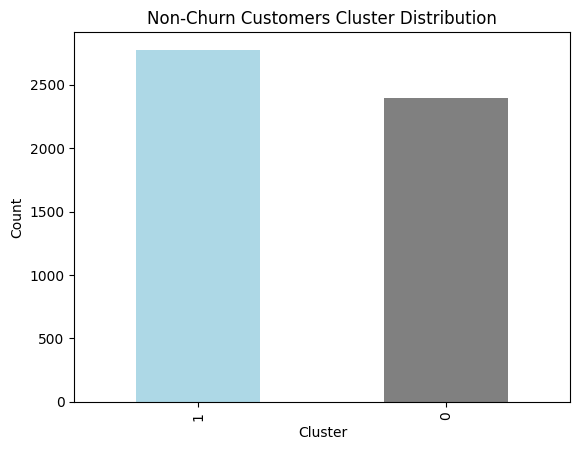

In [ ]:
import matplotlib.pyplot as plt

# Assuming data is your DataFrame
XX['Cluster_Labels'].value_counts().plot(kind='bar', color=['lightblue', 'grey'])
plt.title('Non-Churn Customers Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [ ]:
mean_data = XX.groupby('Cluster_Labels')[['Count Used Product','Tenure Months','Monthly Purchase (Thou. IDR)']].agg('mean')
mean_data

,Count Used Product,Tenure Months,Monthly Purchase (Thou. IDR)
Cluster_Labels,,,
0,3.868224,52.052544,112.693736
1,0.638329,25.059438,51.095784


In [ ]:
std_data = XX.groupby('Cluster_Labels')[['Count Used Product','Tenure Months','Monthly Purchase (Thou. IDR)']].agg('std')
std_data

,Count Used Product,Tenure Months,Monthly Purchase (Thou. IDR)
Cluster_Labels,,,
0,1.250175,18.135601,23.334988
1,0.949325,21.494966,28.567924


## **Frek**

### All Products

In [ ]:
mean_data = XX.groupby('Cluster_Labels')[['Count Used Product']].agg('mean')
mean_data = mean_data.rename({'Count Used Product': 'mean_Count Used Product'}, axis=1)

std_data = XX.groupby('Cluster_Labels')[['Count Used Product']].agg('std')
std_data = std_data.rename({'Count Used Product': 'std_Count Used Product'}, axis=1)

final_data = pd.concat([mean_data, std_data], axis=1)
final_data

,mean_Count Used Product,std_Count Used Product
Cluster_Labels,,
0,3.868224,1.250175
1,0.638329,0.949325


### Each Products

In [ ]:
mean_data = XX.groupby('Cluster_Labels')[['Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp']].agg('mean')
mean_data

,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp
Cluster_Labels,,,,,,
0,0.560467,0.654295,0.672644,0.588824,0.692661,0.699333
1,0.136888,0.121398,0.095101,0.115994,0.083573,0.085375


In [ ]:
std_data = XX.groupby('Cluster_Labels')[['Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp']].agg('std')
std_data

,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp
Cluster_Labels,,,,,,
0,0.496434,0.475697,0.469346,0.492150,0.461488,0.458644
1,0.343791,0.326648,0.293407,0.320276,0.276797,0.279489


## **Recency**

In [ ]:
mean_data = XX.groupby('Cluster_Labels')[['Tenure Months']].agg('mean')
mean_data = mean_data.rename({'Tenure Months': 'mean_Tenure Months'}, axis=1)

std_data = XX.groupby('Cluster_Labels')[['Tenure Months']].agg('std')
std_data = std_data.rename({'Tenure Months': 'std_Tenure Months'}, axis=1)

final_data = pd.concat([mean_data, std_data], axis=1)
final_data

,mean_Tenure Months,std_Tenure Months
Cluster_Labels,,
0,52.052544,18.135601
1,25.059438,21.494966


## **Monetary**

In [ ]:
mean_data = XX.groupby('Cluster_Labels')[['Monthly Purchase (Thou. IDR)']].agg('mean')
mean_data = mean_data.rename({'Monthly Purchase (Thou. IDR)': 'mean_Monthly Purchase (Thou. IDR)'}, axis=1)

std_data = XX.groupby('Cluster_Labels')[['Monthly Purchase (Thou. IDR)']].agg('std')
std_data = std_data.rename({'Monthly Purchase (Thou. IDR)': 'std_Monthly Purchase (Thou. IDR)'}, axis=1)

final_data = pd.concat([mean_data, std_data], axis=1)
final_data

,mean_Monthly Purchase (Thou. IDR),std_Monthly Purchase (Thou. IDR)
Cluster_Labels,,
0,112.693736,23.334988
1,51.095784,28.567924
